In [74]:

import pickle
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
import pickle

import pandas as pd

from IPython.display import Image

from google.auth.transport.requests import Request

def display_image(id):
    img = google_photos.mediaItems().get(mediaItemId=id).execute()
    return Image(img['baseUrl'], format='jpg')
def main():
	# If modifying these scopes, delete the file token.pickle.
	SCOPES = ['https://www.googleapis.com/auth/photoslibrary.readonly']

	creds = None
	# The file token.pickle stores the user's access and refresh tokens, and is
	# created automatically when the authorization flow completes for the first
	# time.
	if os.path.exists('token.pickle'):
		with open('token.pickle', 'rb') as token:
			creds = pickle.load(token)
	# If there are no (valid) credentials available, let the user log in.
	if not creds or not creds.valid:
		if creds and creds.expired and creds.refresh_token:
			creds.refresh(Request())
		else:
			flow = InstalledAppFlow.from_client_secrets_file(
				'credentials.json', SCOPES)
			creds = flow.run_local_server(port=0)
		# Save the credentials for the next run
		with open('token.pickle', 'wb') as token:
			pickle.dump(creds, token)

	google_photos = build('photoslibrary', 'v1', credentials=creds, static_discovery=False)



	items = []
	nextpagetoken = None
	# The default number of media items to return at a time is 25. The maximum pageSize is 100.
	while nextpagetoken != '':
		print(f"Number of items processed:{len(items)}", end='\r')
		results = google_photos.mediaItems().list(pageSize=100, pageToken=nextpagetoken).execute()
		items += results.get('mediaItems', [])
		nextpagetoken = results.get('nextPageToken', '')


	df = pd.DataFrame(items)

	# Taking the column mediaMetadata and splitting it into individual columns
	dfmeta = df.mediaMetadata.apply(pd.Series)

	# Combining all the different columns into one final dataframe
	photos = pd.concat(
		[
			df.drop('mediaMetadata', axis=1), 
			dfmeta.drop('photo', axis=1), 
			dfmeta.photo.apply(pd.Series)
		], axis=1
	)


	photos.creationTime = pd.to_datetime(photos.creationTime)

	# Convert other numeric data into numeric dtypes
	for c in ['width', 'height', 'apertureFNumber', 'focalLength', 'isoEquivalent']:
		photos[c] = pd.to_numeric(photos[c])
	
	photos.to_hdf('google_photo_data.hdf', key='photos')


	with open('token.pickle', 'rb') as token:
		creds = pickle.load(token)
	google_photos = build('photoslibrary', 'v1', credentials=creds, static_discovery=False)





	photos = pd.read_hdf('google_photo_data.hdf')
	display_image(photos.iloc[8560].id)

if __name__ == '__main__':
    main()

C:\Users\ksubram2\Anaconda3\lib\site-packages\pandas\io\pytables.py:280: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  f(store)
C:\Users\ksubram2\Anaconda3\lib\site-packages\pandas\io\pytables.py:280: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_items] [items->None]

  f(store)
C:\Users\ksubram2\Anaconda3\lib\site-packages\pandas\core\generic.py:2606: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['id', 'productUrl', 'baseUrl', 'mimeType', 'filename', 'description',
       'video', 'cameraMake', 'cameraModel', 'exposureTime'],
      dtype='object')]

  pytables.to_hdf(


value: 5075


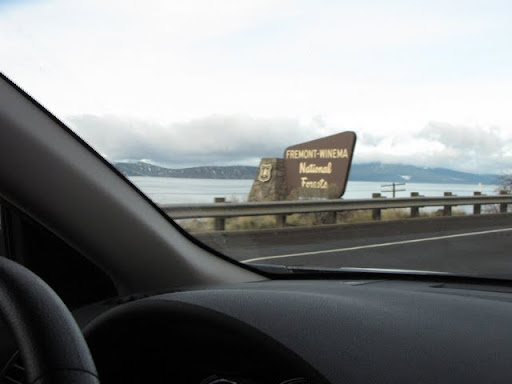

Total photos: 8595
image/jpeg    8239
video/mp4      224
image/heif      80
image/png       41
image/gif       11
Name: mimeType, dtype: int64
---------------------------
Camera's Used:
Canon                3656
Xiaomi               1253
NIKON CORPORATION     936
Letv                  895
XIAOMI                293
Apple                 283
SAMSUNG               190
SONY                   71
Name: cameraMake, dtype: int64
---------------------------
Year wise chart:


<AxesSubplot:xlabel='creationTime'>

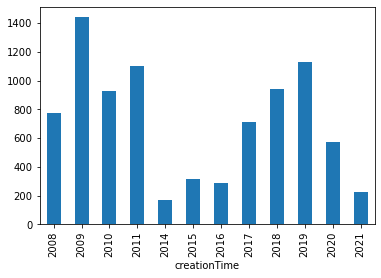

In [80]:
import pickle
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
import pickle

# generate random integer values
from numpy.random import seed
from numpy.random import randint
import secrets

import pandas as pd

from IPython.display import Image, display

from google.auth.transport.requests import Request


with open('token.pickle', 'rb') as token:
    creds = pickle.load(token)
google_photos = build('photoslibrary', 'v1', credentials=creds, static_discovery=False)


photos = pd.read_hdf('google_photo_data.hdf')
#####display a random image 
# seed random number generator
seed(1)
# generate some integers
valueInt = secrets.randbelow(len(photos)-1)
print (f"value: {valueInt}")
img = google_photos.mediaItems().get(mediaItemId=photos.iloc[valueInt].id).execute()
img = Image(img['baseUrl'], format='jpg')
display(img)

##analytics of photos
print (f"Total photos: {len(photos)}")
print( photos.mimeType.value_counts())
print("---------------------------")
print ("Camera's Used:")
print(photos.cameraMake.value_counts())
print("---------------------------")
print ("Year wise chart:")
photos.groupby(photos.creationTime.dt.year).id.count().plot(kind='bar')